<a href="https://colab.research.google.com/github/mal-bertsen/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Differentiation Problem Statement

In [2]:
#A numerical grid is an evenly spaced set of points over the domain of a function
#(i.e., the independent variable), over some interval. The spacing or step size
#of a numerical grid is the distance between adjacent points on the grid.
#For the purpose of this text, if x is a numerical grid, then x_j is the jth
# point in the numerical grid and h is the spacing between xj−1 and xj.


Finite Difference Approximating Derivatives

<ipython-input-3-061e3403e233>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


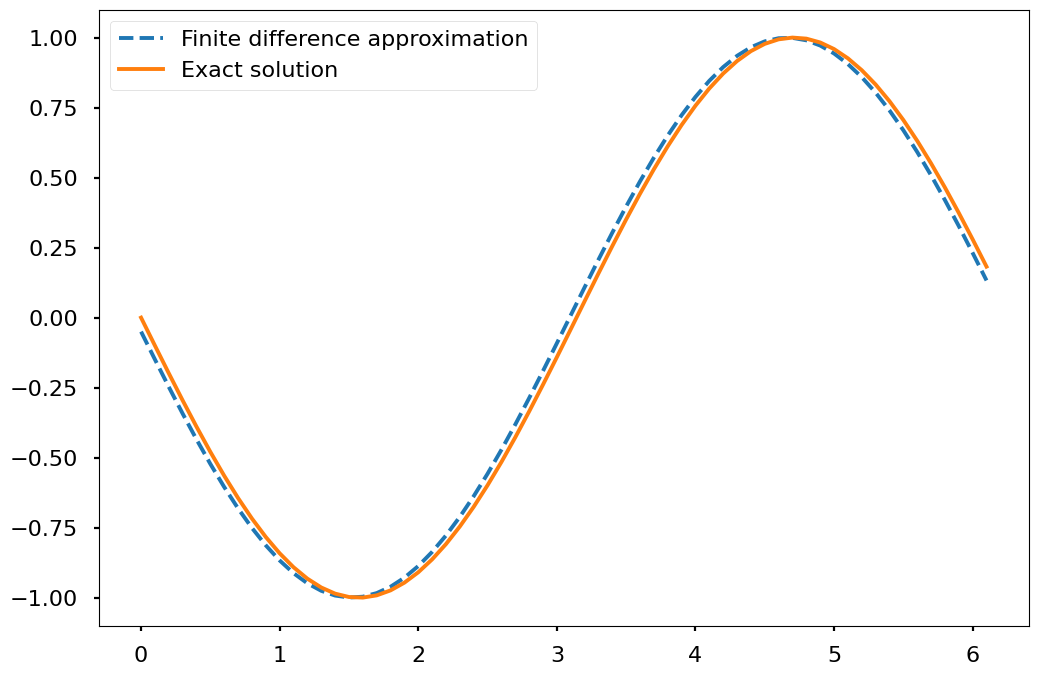

0.049984407218554114


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

#Consider the function f(x)=cos(x) . We know the derivative of cos(x) is −sin(x)
#Although in practice we may not know the underlying function we are finding the derivative for, we use the
#simple example to illustrate the aforementioned numerical differentiation methods and their accuracy.
#The following code computes the derivatives numerically.
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

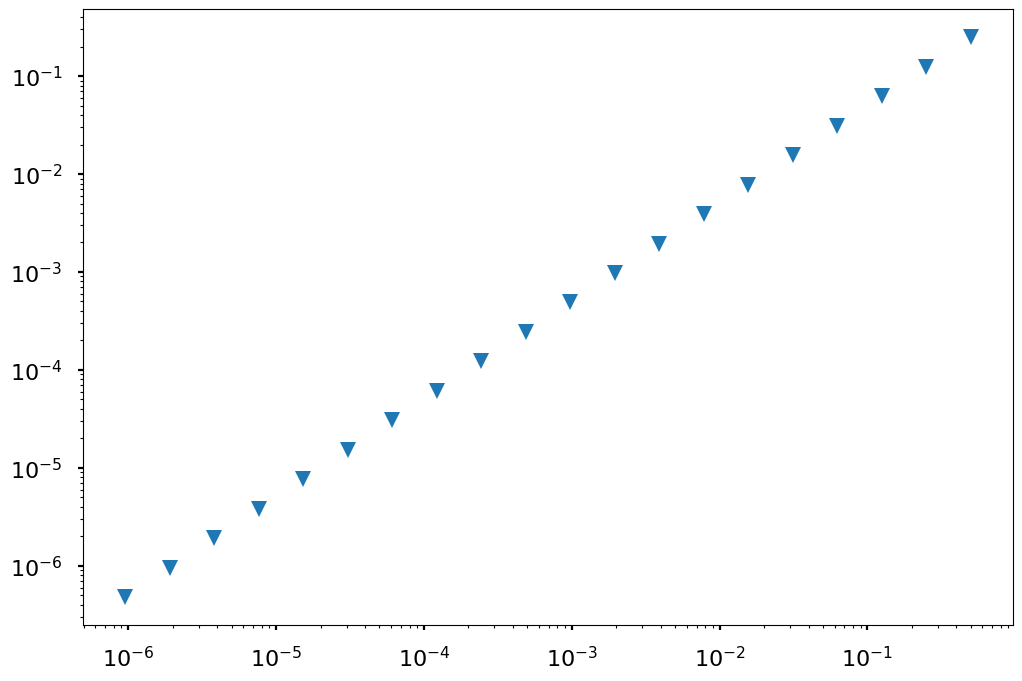

In [4]:
#The following code computes the numerical derivative of f(x)=cos(x) using the forward difference formula for decreasing step sizes, h.
# It then plots the maximum error between the approximated derivative and the true derivative versus h as shown in the generated figure.
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

Approximating of Higher Order Derivatives

In [5]:
#It also possible to use Taylor series to approximate higher order derivatives
#(e.g., f′′(xj),f′′′(xj), etc.).
#For example, taking the Taylor series around a=xj and then computing it at x=xj−1 and xj+1 gives
#f(xj−1)=f(xj)−h*f′(xj)+h^(2)*f′′(xj)/2−h^(3)*f′′′(xj)/6+⋯
#and
#f(xj+1)=f(xj)+h*f′(xj)+h^(2)*f′′(xj)/2+h^(3)*f′′′(xj)/6+⋯.
#If we add these two equations together, we get
#f(xj−1)+f(xj+1)=2f(xj)+h^(2)*f′′(xj)+h^(4)f′′′′(xj)/24+⋯

Numerical Differentiation with noise

<ipython-input-6-0a199b06ab69>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


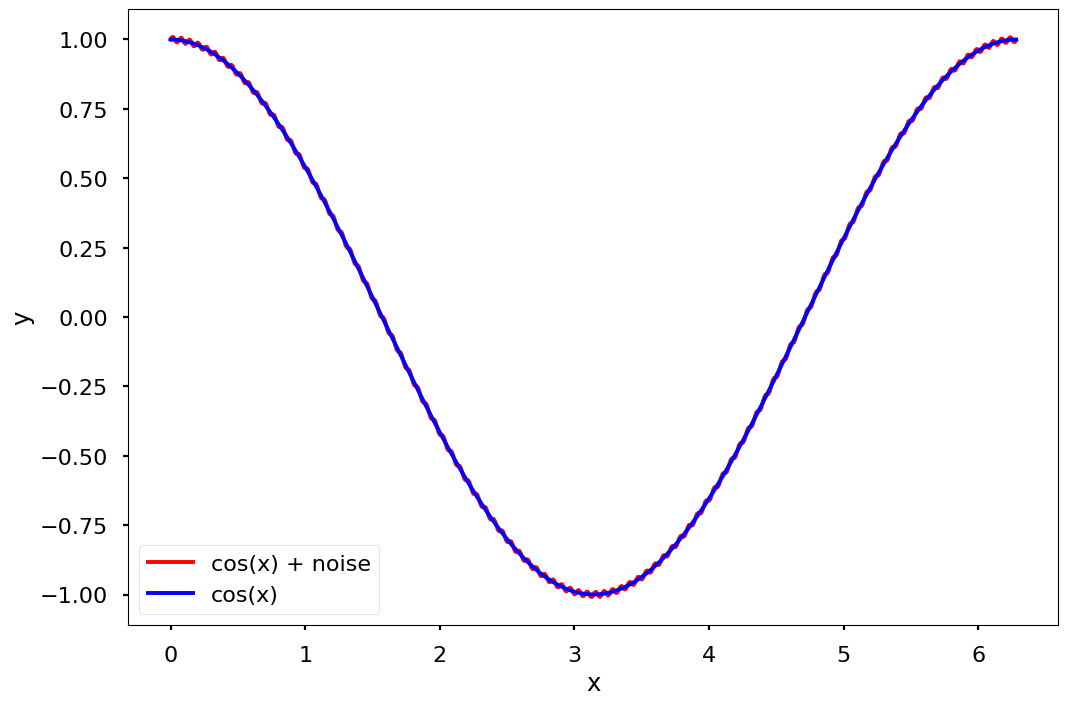

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


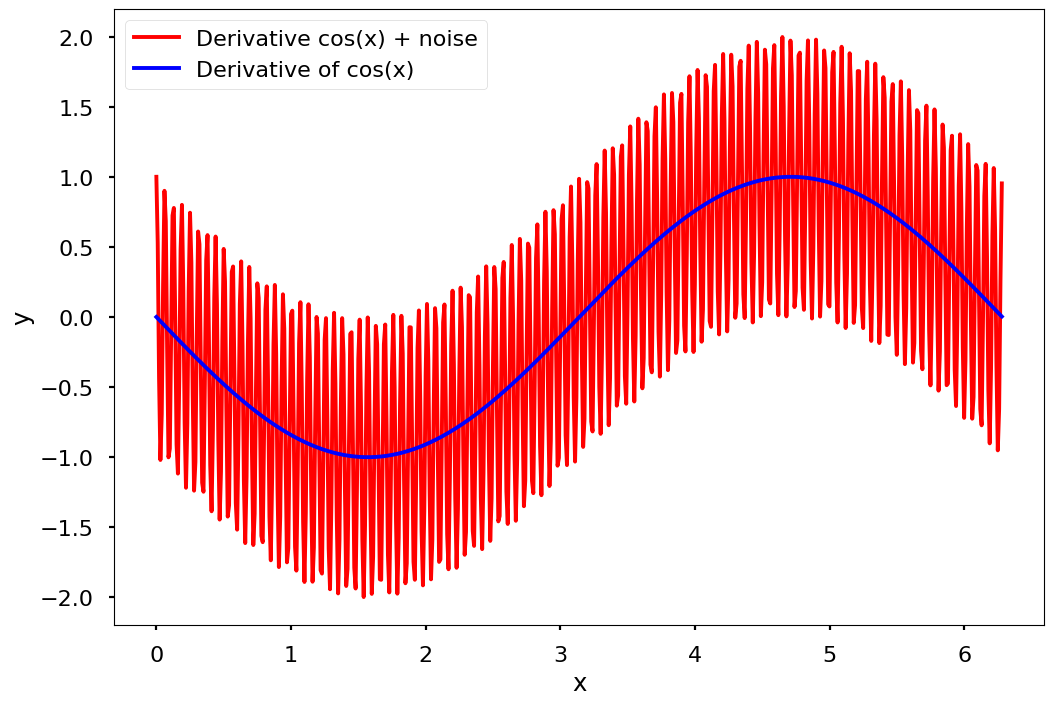

In [7]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()